## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_test.shape

(10000,)

### Find dimensions of an image in the dataset

In [6]:
#Ht and Width of image in pixels
x_train.shape[1:3]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [7]:
import keras
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [8]:
y_train.shape

(60000, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [11]:
# Keras expects the input in standard format (no of samples/batch_size,image_height, image_width, number of channels) and hence reshaping needed for CNN
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
y_test.shape

(10000, 10)

### Import the necessary layers from keras to build the model

In [15]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, Convolution2D, MaxPool2D
from keras import optimizers
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [16]:
#Initialize Sequential model
model = keras.models.Sequential()

## add 2 conv layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(Flatten())

# Adding Hidden Layers and Output Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Loss and Optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## callback
early_stopping=keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,verbose=1,mode='auto',min_delta=0.001)
callback_list=[early_stopping]

In [17]:
model.fit(x_train,y_train,batch_size=500,epochs=20,validation_data=(x_test,y_test),callbacks=callback_list)

Epoch 1/20
120/120 [==============================] - 9s 19ms/step - loss: 0.8011 - accuracy: 0.7155 - val_loss: 0.3716 - val_accuracy: 0.8667
Epoch 2/20
120/120 [==============================] - 2s 16ms/step - loss: 0.3240 - accuracy: 0.8845 - val_loss: 0.3284 - val_accuracy: 0.8810
Epoch 3/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2800 - accuracy: 0.8983 - val_loss: 0.2893 - val_accuracy: 0.8971
Epoch 4/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2267 - accuracy: 0.9174 - val_loss: 0.2733 - val_accuracy: 0.9006
Epoch 5/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1980 - accuracy: 0.9279 - val_loss: 0.2732 - val_accuracy: 0.9036
Epoch 6/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1759 - accuracy: 0.9359 - val_loss: 0.2654 - val_accuracy: 0.9071
Epoch 7/20
120/120 [==============================] - 2s 16ms/step - loss: 0.1521 - accuracy: 0.9442 - val_loss: 0.2681 - val_accuracy: 0.9063

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [19]:
#Initialize Sequential model
model2 = keras.models.Sequential()

## add 2 conv layers
model2.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(Convolution2D(32,(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(rate=0.25))
model2.add(Flatten())

# Adding Hidden Layers and Output Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

## Loss and Optimizer
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## callback
early_stopping=keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,verbose=1,mode='auto',min_delta=0.001)
callback_list=[early_stopping]

In [20]:
model2.fit(x_train,y_train,batch_size=500,epochs=20,validation_data=(x_test,y_test),callbacks=callback_list)

Epoch 1/20
120/120 [==============================] - 2s 16ms/step - loss: 0.9090 - accuracy: 0.6870 - val_loss: 0.4290 - val_accuracy: 0.8472
Epoch 2/20
120/120 [==============================] - 2s 15ms/step - loss: 0.3958 - accuracy: 0.8610 - val_loss: 0.3563 - val_accuracy: 0.8740
Epoch 3/20
120/120 [==============================] - 2s 15ms/step - loss: 0.3296 - accuracy: 0.8823 - val_loss: 0.3199 - val_accuracy: 0.8856
Epoch 4/20
120/120 [==============================] - 2s 15ms/step - loss: 0.2968 - accuracy: 0.8937 - val_loss: 0.3069 - val_accuracy: 0.8883
Epoch 5/20
120/120 [==============================] - 2s 15ms/step - loss: 0.2689 - accuracy: 0.9020 - val_loss: 0.2854 - val_accuracy: 0.8963
Epoch 6/20
120/120 [==============================] - 2s 15ms/step - loss: 0.2501 - accuracy: 0.9081 - val_loss: 0.2658 - val_accuracy: 0.9045
Epoch 7/20
120/120 [==============================] - 2s 15ms/step - loss: 0.2329 - accuracy: 0.9149 - val_loss: 0.2483 - val_accuracy: 0.9097

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
#datagen=ImageDataGenerator(rotation_range=20,
#                           width_shift_range=0.2,
#                           height_shift_range=0.2,
#                           horizontal_flip=True,
#                           validation_split=0.2)

# this generates batches of image data with real-time data augmentation

datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to be 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=50, # randomly rotate images in the range (0 to 180 degrees)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=False, # randomly flip images horizontally
    vertical_flip=False # randomly flip images vertically
)

# prepare the generator
datagen.fit(x_train)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

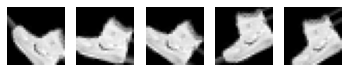

In [26]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [27]:
#Initialize Sequential model
model3 = keras.models.Sequential()

## add 2 conv layers
model3.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model3.add(Convolution2D(32,(3,3),activation='relu'))
model3.add(MaxPool2D((2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())

# Adding Hidden Layers and Output Layer
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

## Loss and Optimizer
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## callback
early_stopping=keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,verbose=1,mode='auto',min_delta=0.001)
callback_list=[early_stopping]
model3.fit_generator(datagen.flow(x_train,y_train,batch_size=32),steps_per_epoch=x_train.shape[0]/32,epochs=20,validation_data=(x_test,y_test),callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 1.0078 - accuracy: 0.6315 - val_loss: 0.5786 - val_accuracy: 0.7770
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6096 - accuracy: 0.7702 - val_loss: 0.4783 - val_accuracy: 0.8274
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5290 - accuracy: 0.8011 - val_loss: 0.4723 - val_accuracy: 0.8297
Epoch 4/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4907 - accuracy: 0.8159 - val_loss: 0.4378 - val_accuracy: 0.8367
Epoch 5/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4561 - accuracy: 0.8263 - val_loss: 0.4111 - val_accuracy: 0.8510
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4355 - accuracy: 0.8342 - val_loss: 0.3837 - val_accuracy: 0.8647
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4206 - accuracy: 0.8441 - val_loss: 0.3828 - val_ac

###  Report the final train and validation accuracy

In [29]:
callback_list[0]

In [31]:
# Validation accuracy
model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8834


[0.3282024562358856, 0.883400022983551]

In [35]:
# Training Accuracy
model3.evaluate(x_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.8950


[0.2837352752685547, 0.8950333595275879]

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy'
    mode='max'
    save_weights_only=True
)

model.fit(epoch=20, callbacks)

model.load_weights(checkpoint_filepath)


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [36]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
X_test.shape

(10000, 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [39]:
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to be 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=50, # randomly rotate images in the range (0 to 180 degrees)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=True # randomly flip images vertically
)

### **Prepare/fit the generator.**

In [40]:
# prepare the generator
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

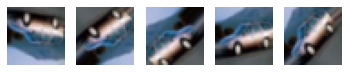

In [50]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[4:5], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype('uint8').squeeze())
    plt.plot()
plt.show()